In [1]:
# =================================
# COMP0078 Coursework 2 Q1.6 RE1.1
# Douglas Chiang
# 15055142
# =================================
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/Colab Notebooks/COMP0078/CW2/Q1

/content/drive/MyDrive/Colab Notebooks/COMP0078/CW2/Q1


In [3]:
ls

 Assignment_2_Question_1a_v3.ipynb     dtrain123.dat
 Assignment_2_Question_1e_2_v1.ipynb   Plots/
 assignment_2_question_1f_1_v1.py     'Q1 Trial.ipynb'
 assignment_2_question_1f_v1.py        zipcombo.dat
 dtest123.dat


Libraries:

In [4]:
import time
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt

Functions for data

In [5]:
def load_dat(fname, Full_Data = False):
    dat = pd.read_csv(fname, sep='\s+', header=None).to_numpy()
    if Full_Data == False:
        y = dat[:, 0].astype(np.int) - 1  # we are zero-based indexing
    else:
        y = dat[:, 0].astype(np.int)
    
    X = dat[:, 1:].astype(np.float64)
    return X, y

def Plot_Accuracy_SV(Ker_para, run, n_epochs, Train_accuracy_All, Test_accuracy_All):
    fig1, ax1 = plt.subplots()

    ax1.plot(range(1, n_epochs), Train_accuracy_All, color='red', label='Training accuracy')
    ax1.plot(range(1, n_epochs), Test_accuracy_All, color='blue', label='Testing accuracy')

    plt.xlabel('Epoch(s)')
    leg = ax1.legend(bbox_to_anchor=(1.5, 1.02), loc='upper right', frameon=False)
    plt.savefig(f"/content/drive/MyDrive/Colab Notebooks/COMP0078/CW2/Q1/Plots/Q1a/d_{Ker_para}_run_{run}_Accuracy_SV.png")

Kernel Calculation

In [6]:
class KernelFunctor:
    """
    Calculate the Kernel values and put them in a matrix
    """
    def __init__(self, Ker_Meth="Poly", Ker_para=2):
        self.Ker_Meth = Ker_Meth
        self.Ker_para = Ker_para
        #self.X_idx = 
    
    def kernel_fn(self, X):
        if self.Ker_Meth == "Poly":
            return (X.dot(X.T))**self.Ker_para
        elif self.Ker_Meth == "Gau":
            pass# return np.exp(-self.Ker_para*np.linalg.norm(p_vec - q_vec)**2)
        else:
            assert False, "Kernel Method Undefined"

K - Class Classifier: One vs Rest Online Perceptron

In [7]:
class OvO_OnlinePerceptron:
    """
    One-vs-One
    """
    def __init__(self, alphas, classifier_values, kernel_matrix, n_classes=3):
        self.alphas              = alphas
        self.kernel_matrix       = kernel_matrix
        self.n_classes           = n_classes
        self.n_classifiers       = int(self.n_classes*(self.n_classes - 1)/2)
        self.classifier_values   = classifier_values

    def fit(self, ran_train_sample_idx, X, y):
        n_samples, n_dim = X.shape

        # record down data
        self.n_dim                = n_dim
        self.n_samples            = range(n_samples)
        self.ran_train_sample_idx = ran_train_sample_idx
        # ------------------------------------------------------
        for i in self.n_samples:
            cls_vals           = self._get_classifier_vals(self.ran_train_sample_idx[i])
            preds              = self.sign(cls_vals)
            truth              = self._label_to_custom_onehot(y[i])
            self.alphas[:, i] += np.where(preds != truth, truth, 0)

        return self.alphas

    def _get_classifier_vals(self, sample_idx):
        """
        This is the classifier:
        .. math::
            w(x) = \sum_i \alpha_i K(x_i, x)
        Args:
            x (np.ndarray): the input feature you would like to classify
        Return:
            An array of size (n_classes,). Each value represents the inner product
            sum between support vectors of a classifier and the incoming feature.
        """
        ret           = np.zeros((self.n_classifiers,))
        kernel_values = self.kernel_matrix[self.ran_train_sample_idx, sample_idx]
        ret          += self.alphas.dot(kernel_values)
        assert ret.shape == (self.n_classifiers,)
        return ret

    def predict(self, sample_idx):
        cls_vals = self._get_classifier_vals(sample_idx)
        return np.argmax(cls_vals)

    @staticmethod
    def sign(val):
        ret = np.where(val <= 0.0, -1, 1)
        return ret

    def _label_to_custom_onehot(self, label: int):
        labels = np.zeros((self.n_classifiers,))
        for i in range(self.n_classifiers):
            if self.classifier_values[i][0] == label:
                labels[i] = 1
            elif self.classifier_values[i][1] == label:
                labels[i] = -1
        return labels

In [8]:
def OvO_Prediction(alphas, kernel_vals, classifier_values):
    m_test = kernel_vals.shape[1]
    y_pred = (alphas.dot(kernel_vals) > 0)*2 - 1
    poll = np.zeros((10, m_test))
    for cls_idx in range(classifier_values.shape[0]):
        pve_votes = (y_pred[cls_idx, :] == 1)
        nve_votes = (y_pred[cls_idx, :] == -1)

        poll[int(classifier_values[cls_idx, 0]), pve_votes] += 1
        poll[int(classifier_values[cls_idx, 1]), nve_votes] += 1
    
    return np.argmax(poll, axis = 0)

In [9]:
# Trial data set:
# X_train, y_train = load_dat("dtrain123.dat", Full_Data = False)
# X_test, y_test   = load_dat("dtest123.dat", Full_Data = False)
# X_dataset = np.vstack((X_train, X_test))
# Y_dataset = np.hstack((y_train, y_test))

# Full data set:
X_dataset, Y_dataset = load_dat("zipcombo.dat", Full_Data = True)
# split_pt = round(X_dataset.shape[0]*0.2)
# X_dataset = X_dataset[:split_pt]
# Y_dataset = Y_dataset[:split_pt]

d = 1
Precalculate Kernel...
**Kernel calculation finished in 1.1710 seconds
Run: 1
**Training: Epoch 1 finished in 2.7356 seconds with Train accuracy 0.9305 and Test accuracy 0.9038.
**Training: Epoch 2 finished in 2.7179 seconds with Train accuracy 0.9244 and Test accuracy 0.8962.
**Training: Epoch 3 finished in 2.7069 seconds with Train accuracy 0.9480 and Test accuracy 0.9269.
**Training: Epoch 4 finished in 2.7232 seconds with Train accuracy 0.9383 and Test accuracy 0.9097.
**Training: Epoch 5 finished in 2.7027 seconds with Train accuracy 0.9599 and Test accuracy 0.9296.
**Training: Epoch 6 finished in 2.6993 seconds with Train accuracy 0.9554 and Test accuracy 0.9263.
**Training: Epoch 7 finished in 2.7282 seconds with Train accuracy 0.9282 and Test accuracy 0.8876.
**Training: Epoch 8 finished in 2.6949 seconds with Train accuracy 0.9488 and Test accuracy 0.9054.
**Training: Epoch 9 finished in 2.7193 seconds with Train accuracy 0.9663 and Test accuracy 0.9253.
**Training: Epoc

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


**Training: Epoch 1 finished in 2.8246 seconds with Train accuracy 0.9550 and Test accuracy 0.9323.
**Training: Epoch 2 finished in 2.8070 seconds with Train accuracy 0.9726 and Test accuracy 0.9495.
**Training: Epoch 3 finished in 2.7759 seconds with Train accuracy 0.9870 and Test accuracy 0.9586.
**Training: Epoch 4 finished in 2.7759 seconds with Train accuracy 0.9929 and Test accuracy 0.9559.
**Training: Epoch 5 finished in 2.7673 seconds with Train accuracy 0.9961 and Test accuracy 0.9602.
**Training: Epoch 6 finished in 2.7704 seconds with Train accuracy 0.9973 and Test accuracy 0.9608.
**Training: Epoch 7 finished in 2.7907 seconds with Train accuracy 0.9974 and Test accuracy 0.9618.
**Training: Epoch 8 finished in 2.7442 seconds with Train accuracy 0.9991 and Test accuracy 0.9656.
**Training: Epoch 9 finished in 2.7842 seconds with Train accuracy 0.9993 and Test accuracy 0.9651.
**Training: Epoch 10 finished in 2.7795 seconds with Train accuracy 0.9993 and Test accuracy 0.9651.

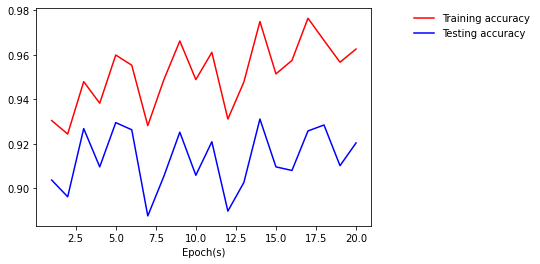

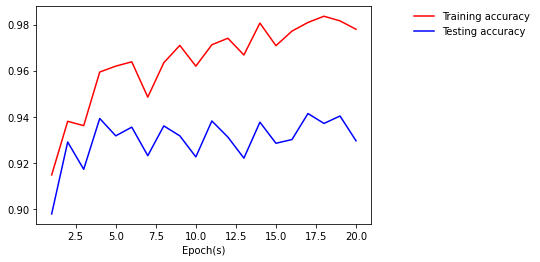

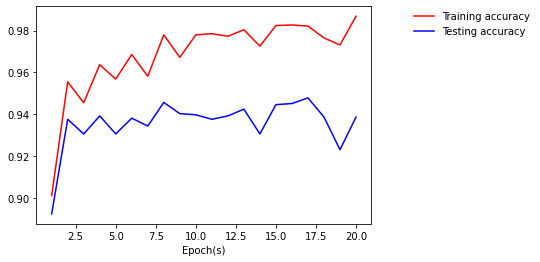

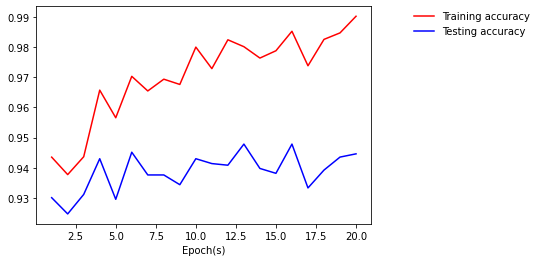

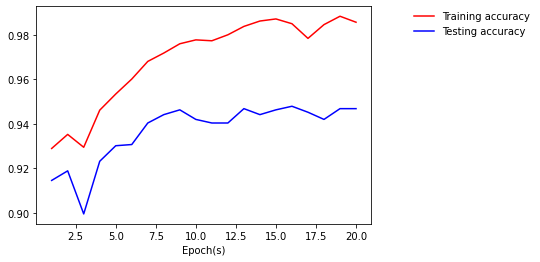

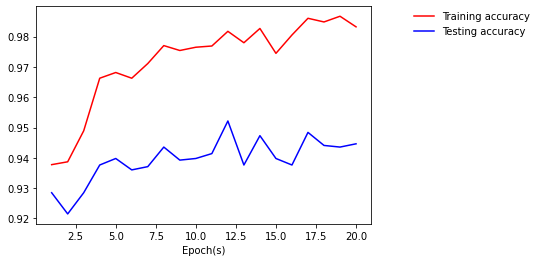

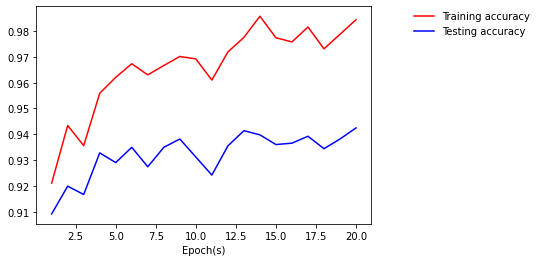

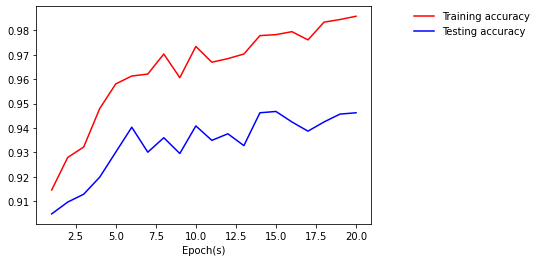

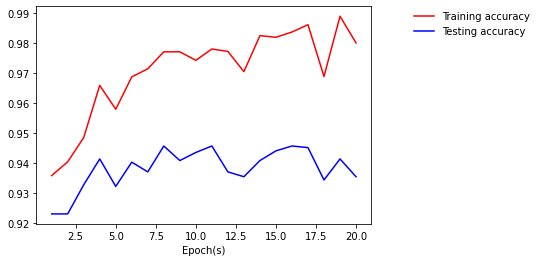

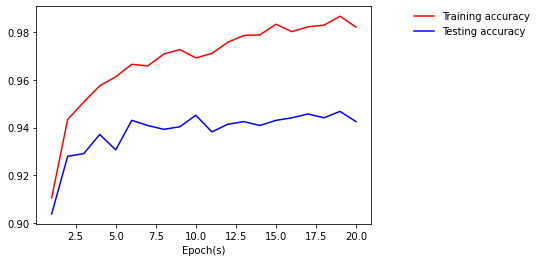

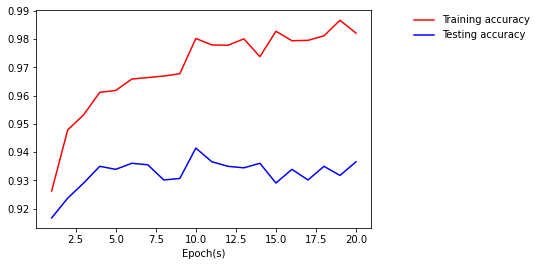

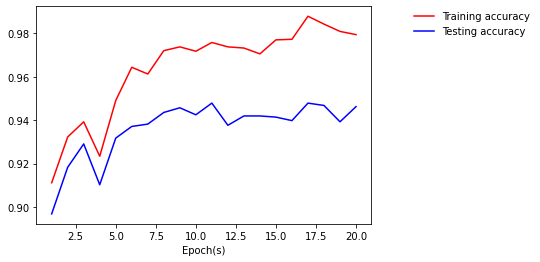

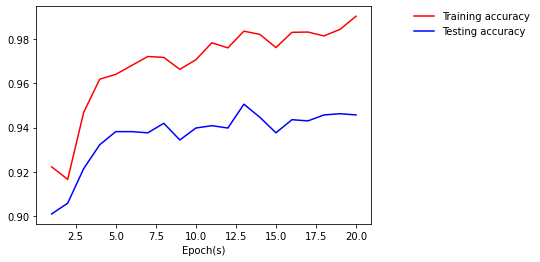

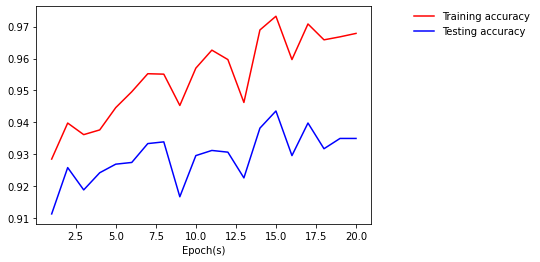

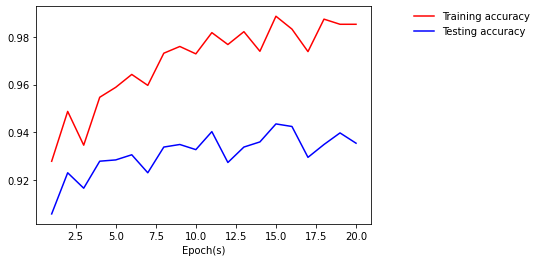

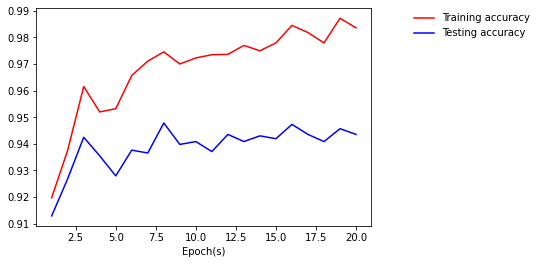

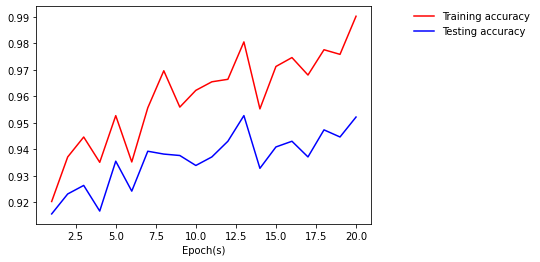

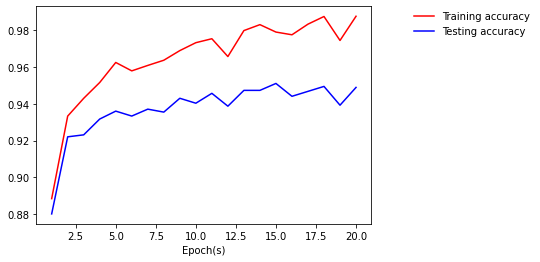

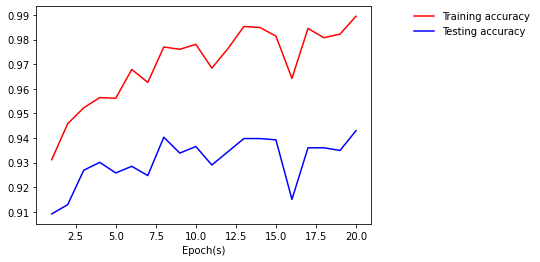

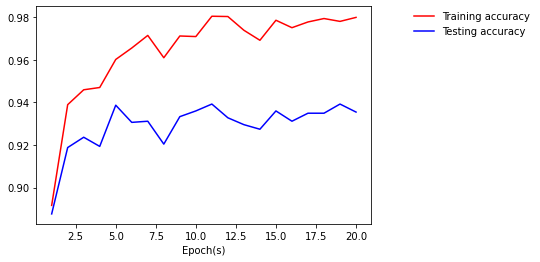

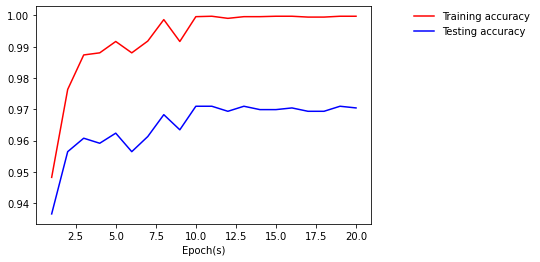

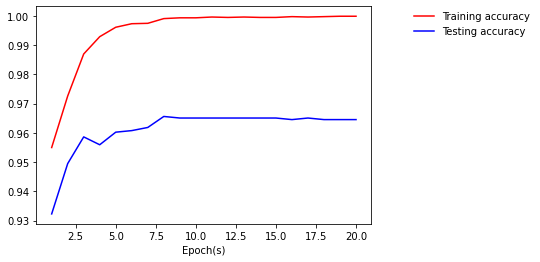

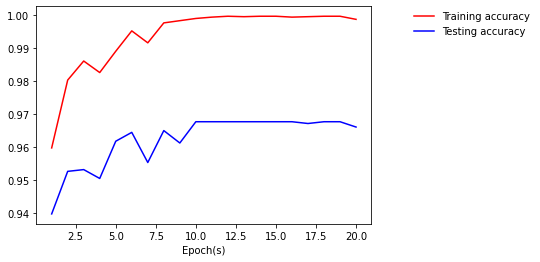

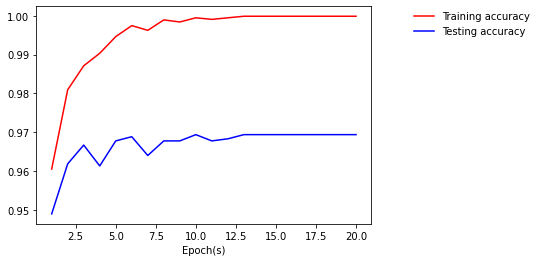

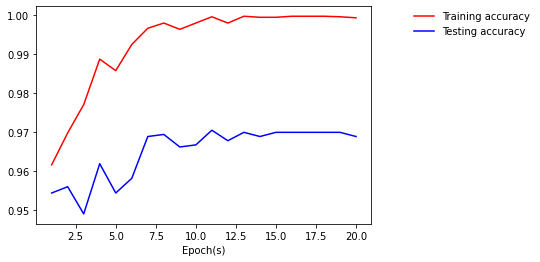

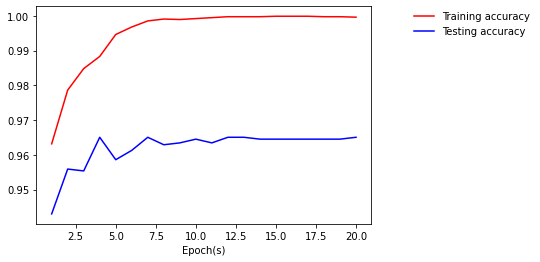

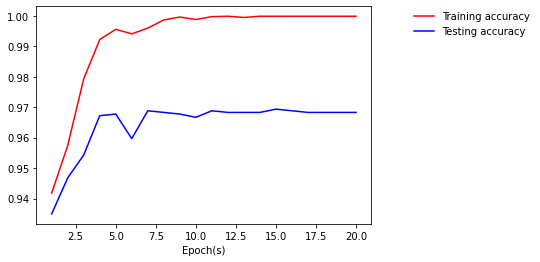

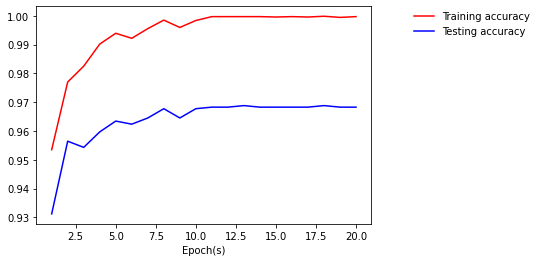

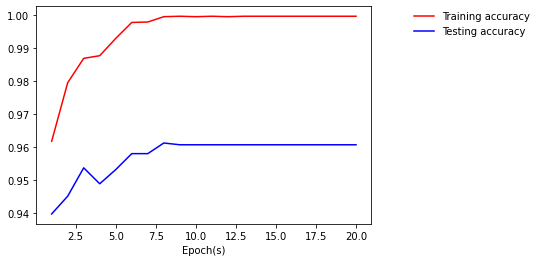

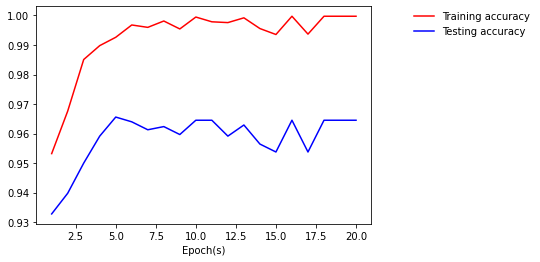

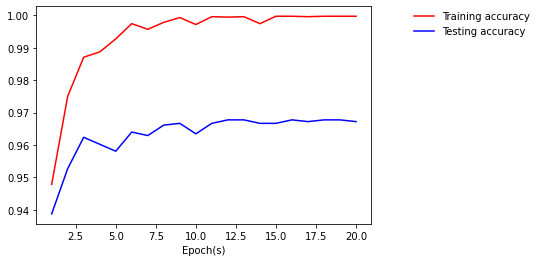

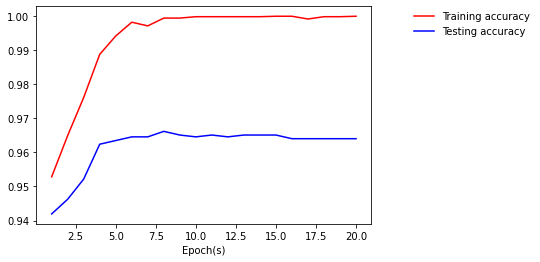

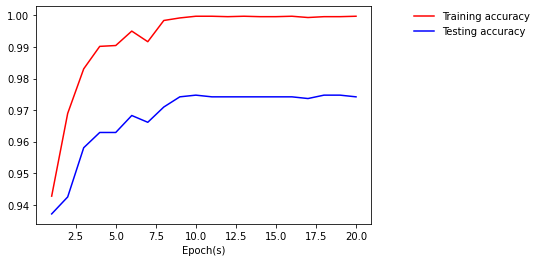

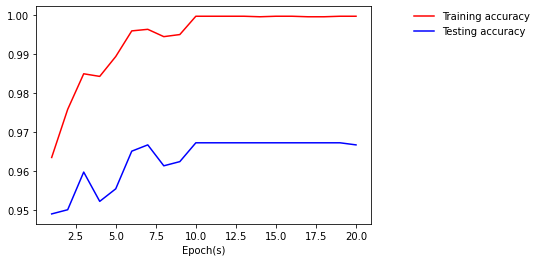

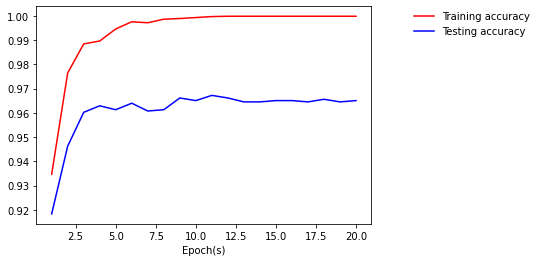

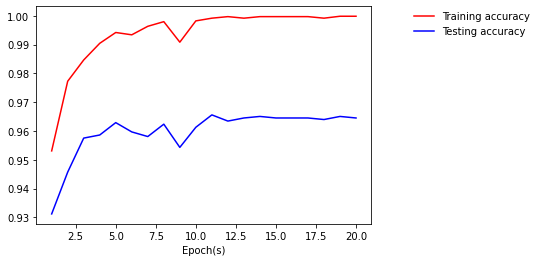

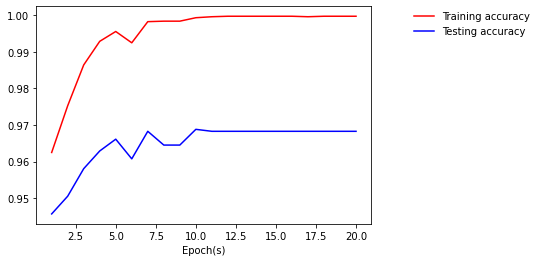

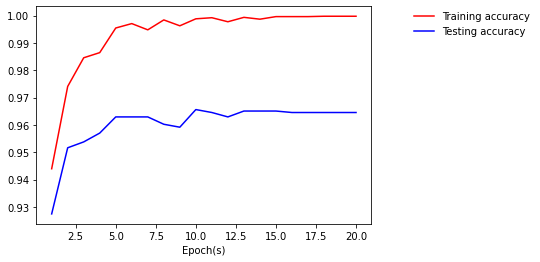

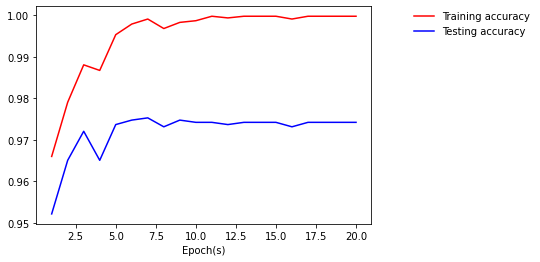

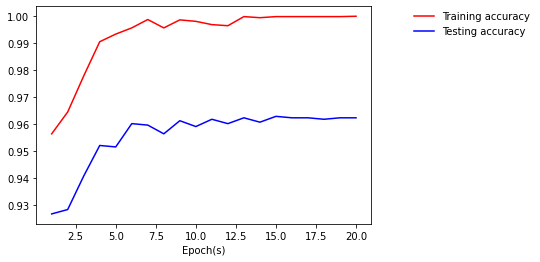

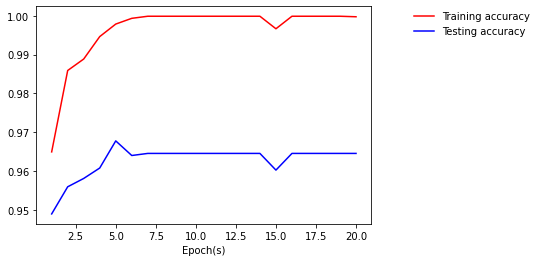

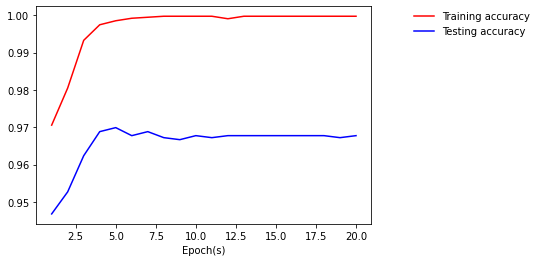

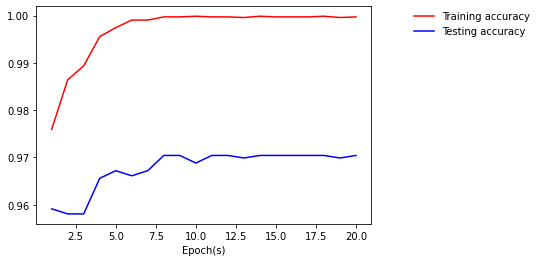

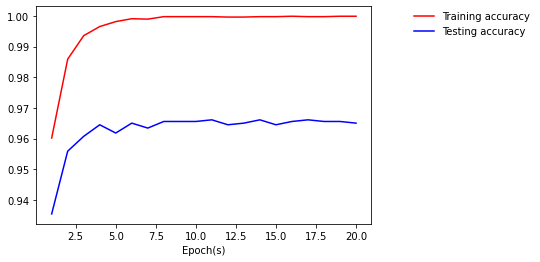

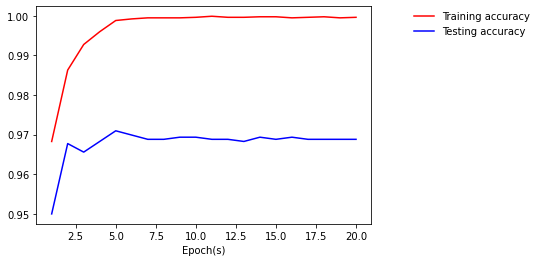

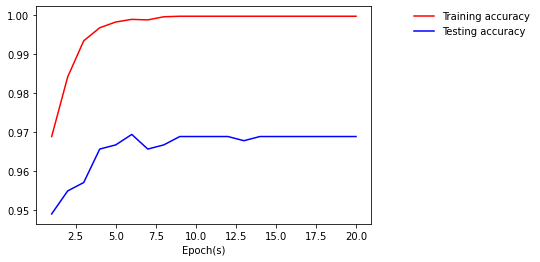

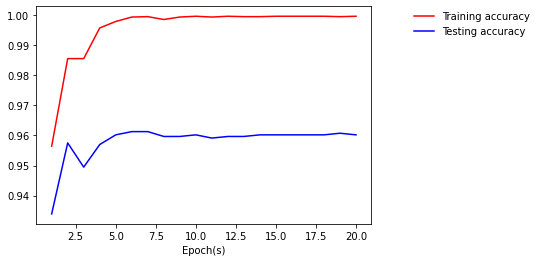

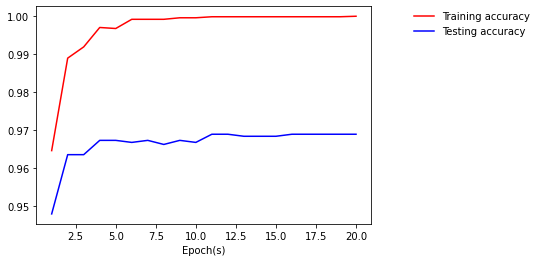

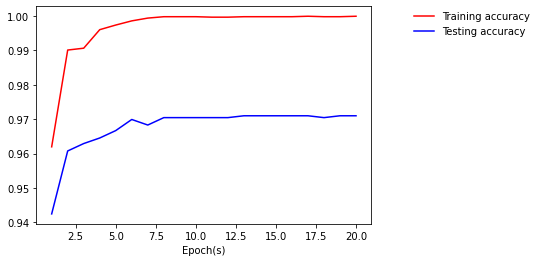

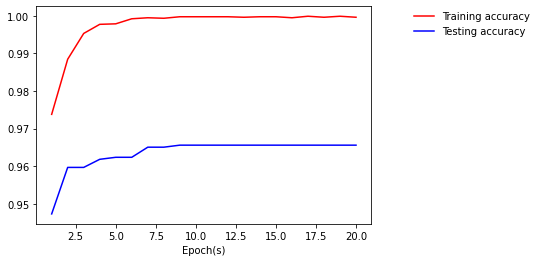

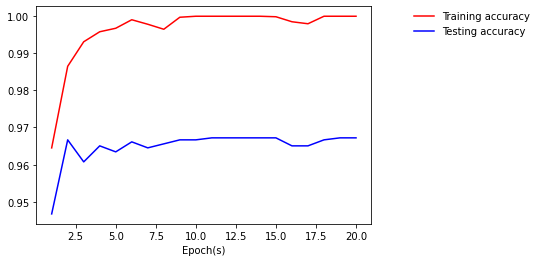

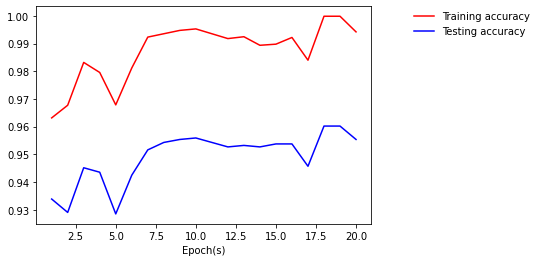

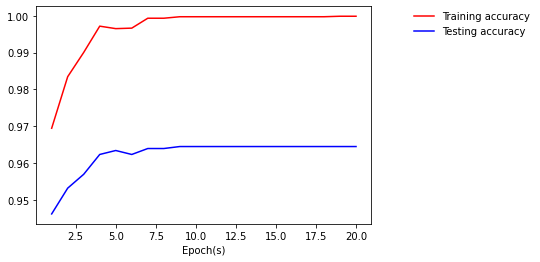

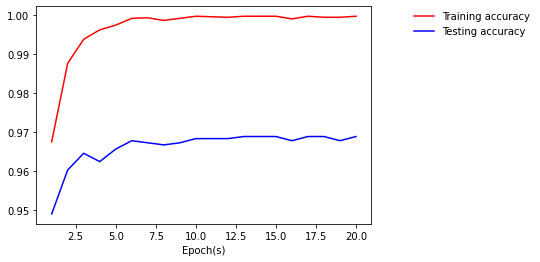

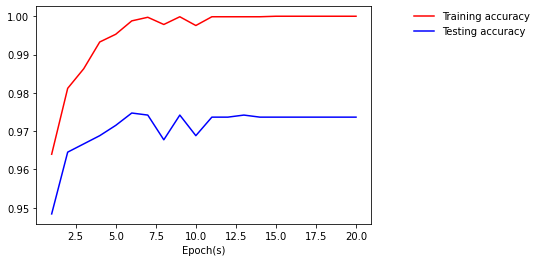

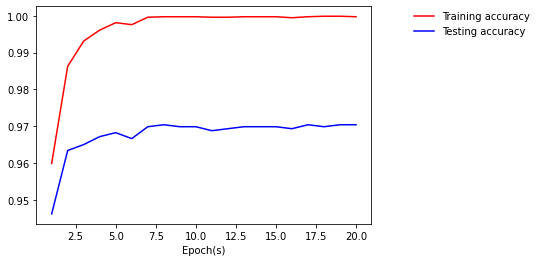

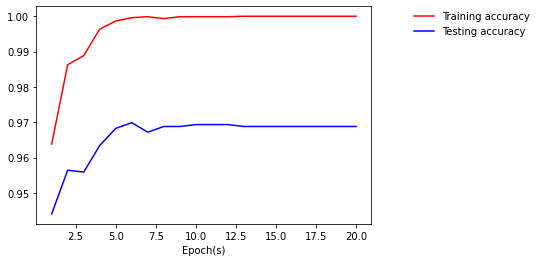

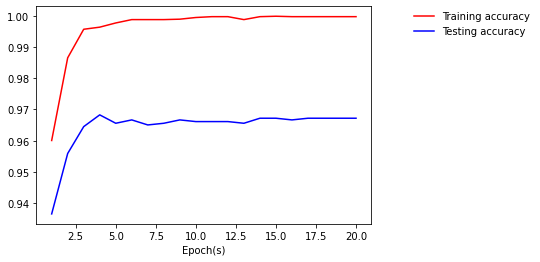

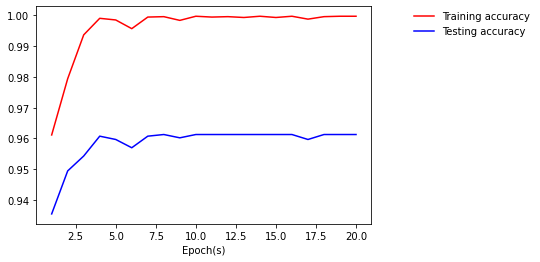

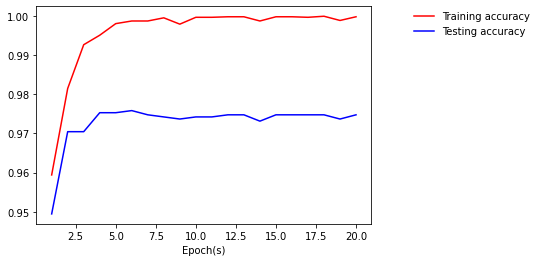

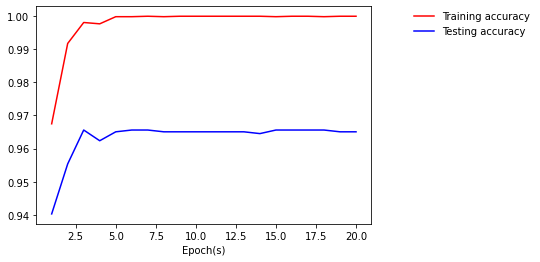

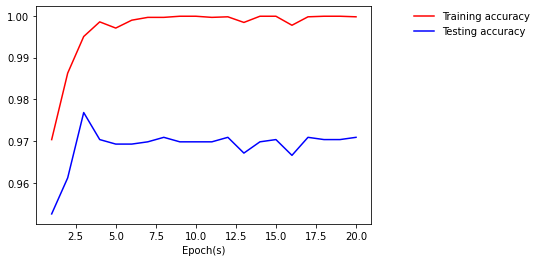

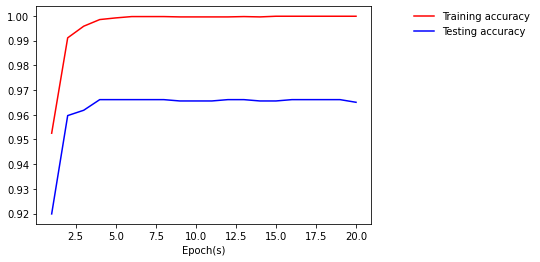

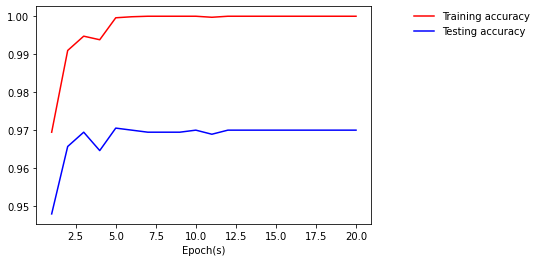

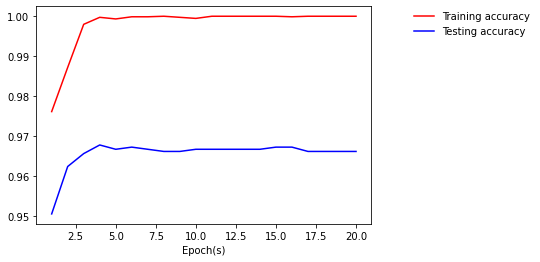

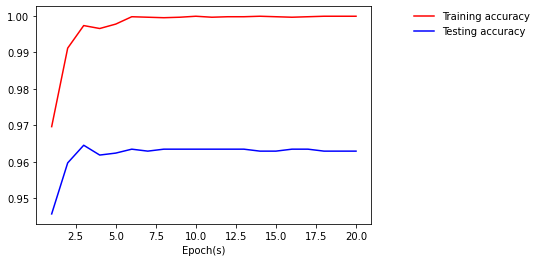

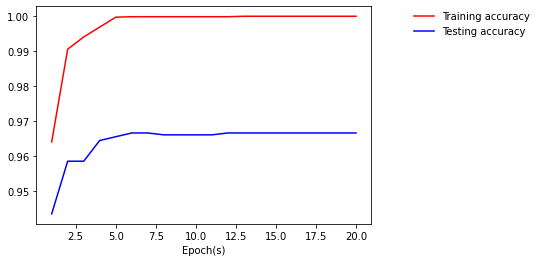

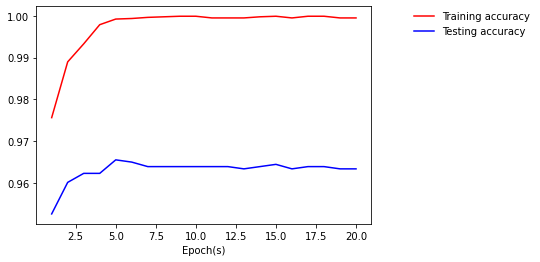

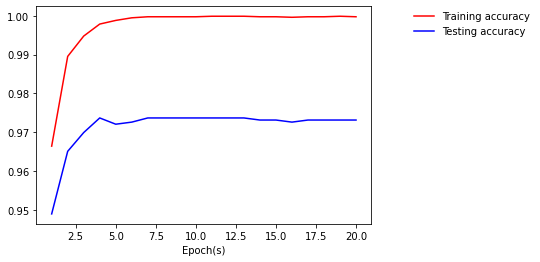

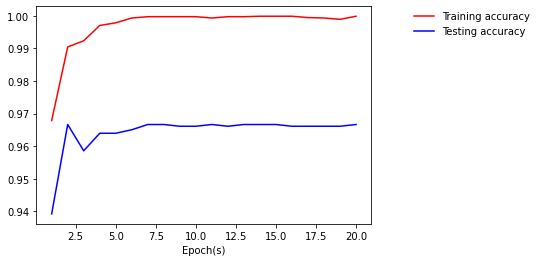

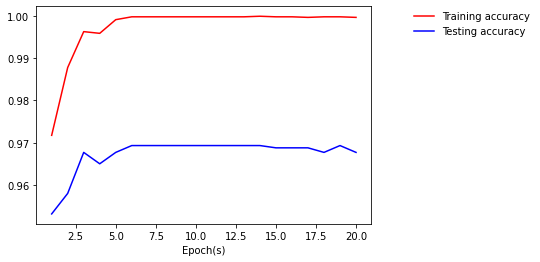

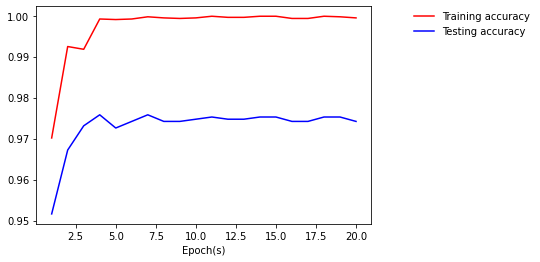

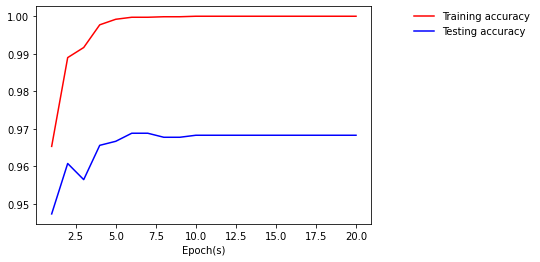

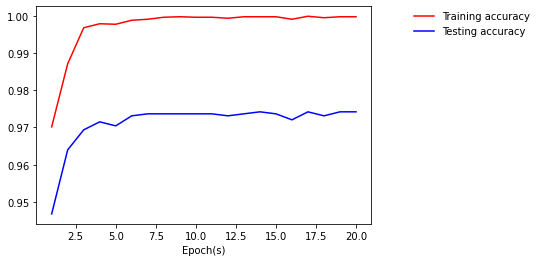

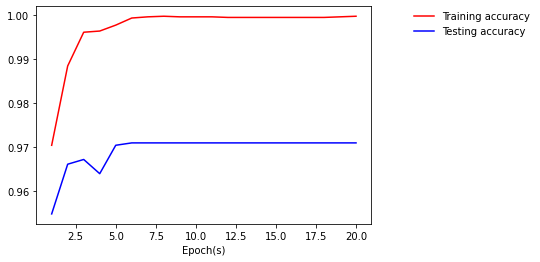

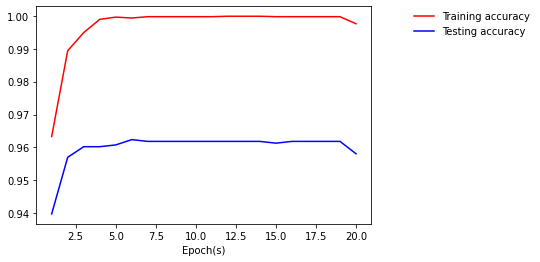

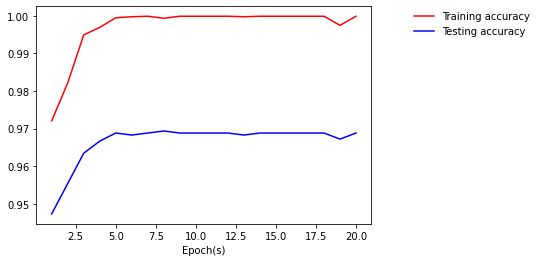

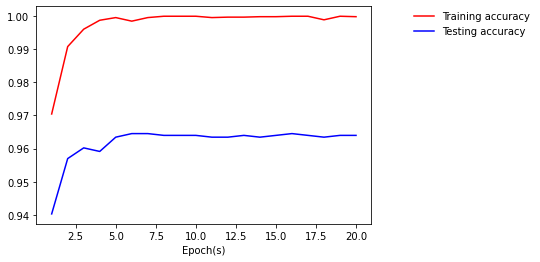

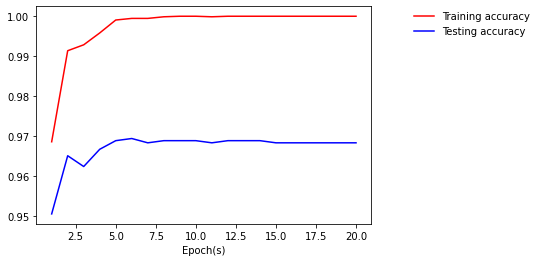

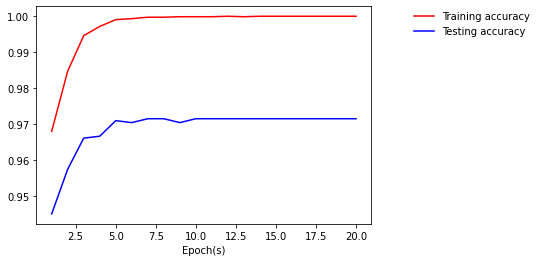

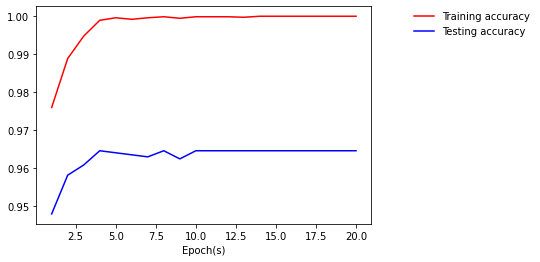

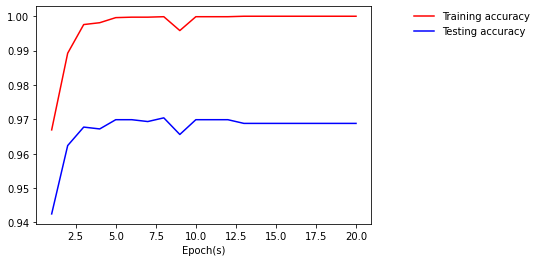

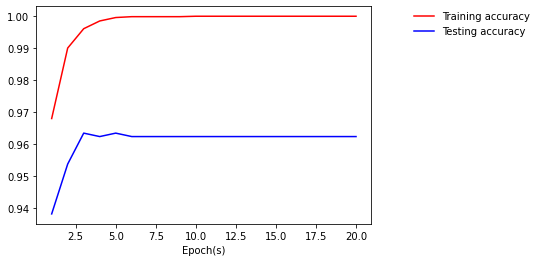

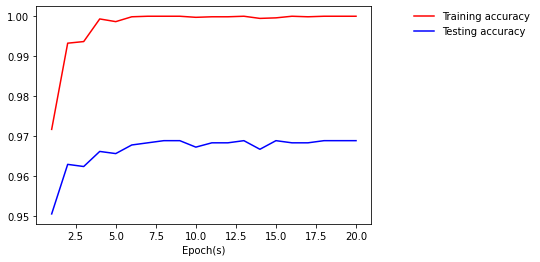

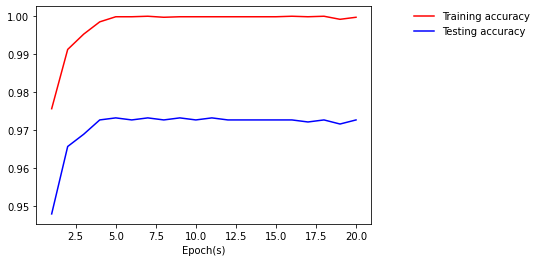

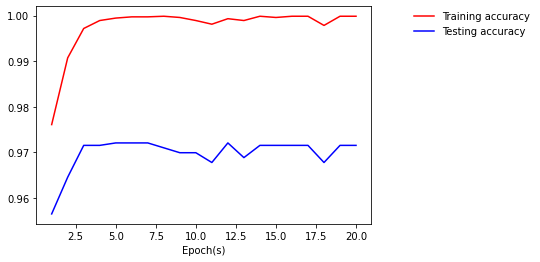

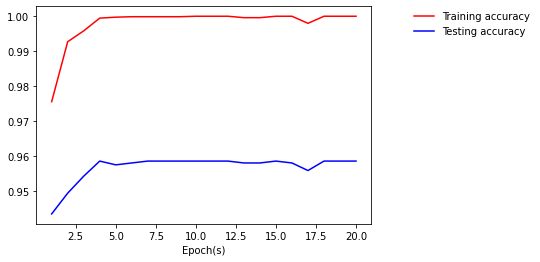

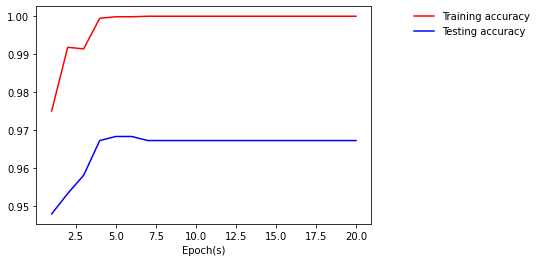

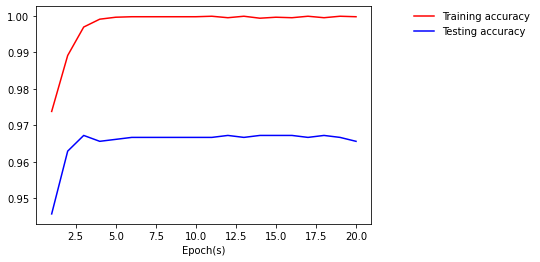

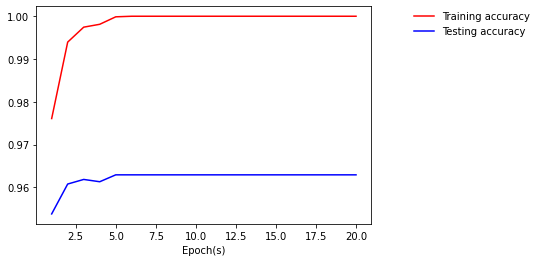

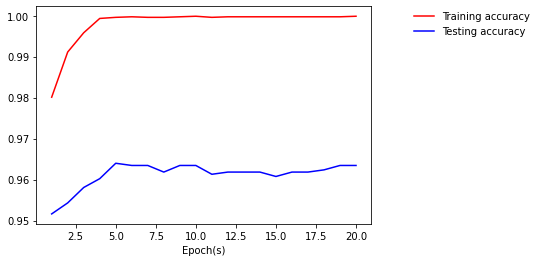

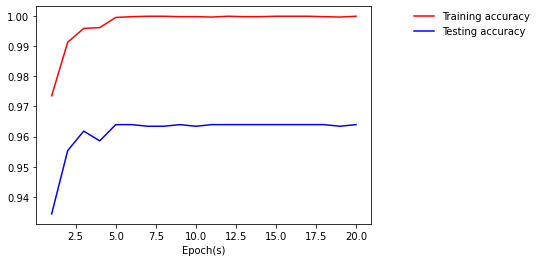

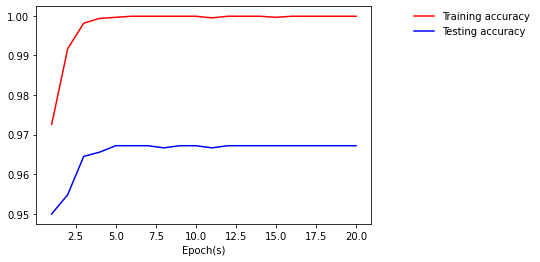

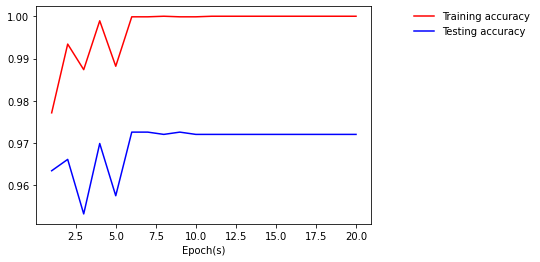

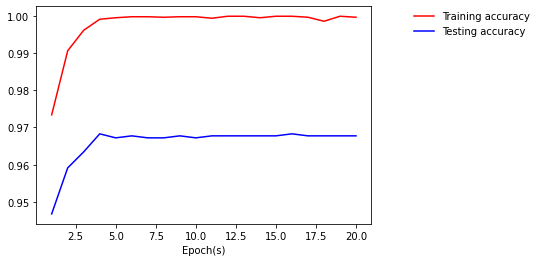

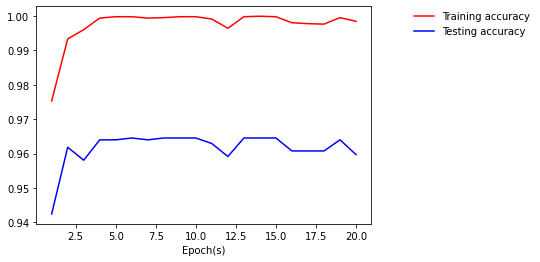

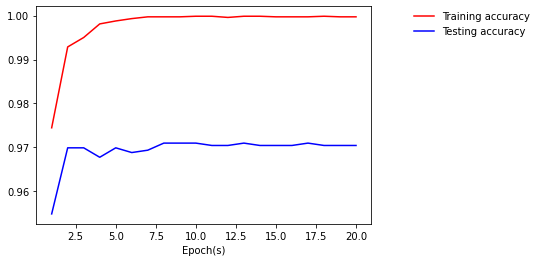

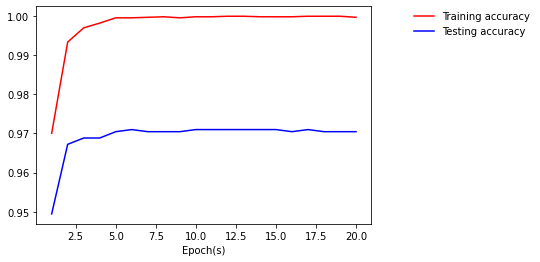

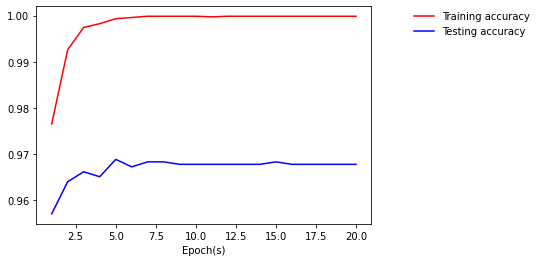

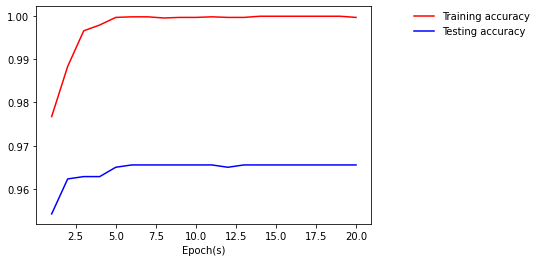

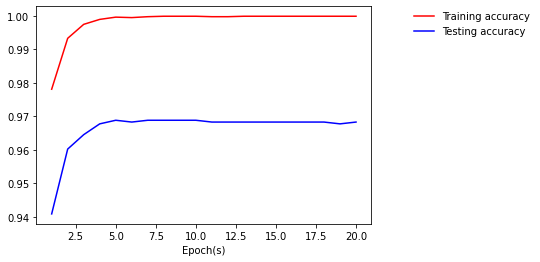

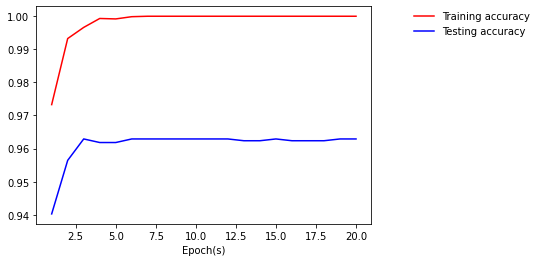

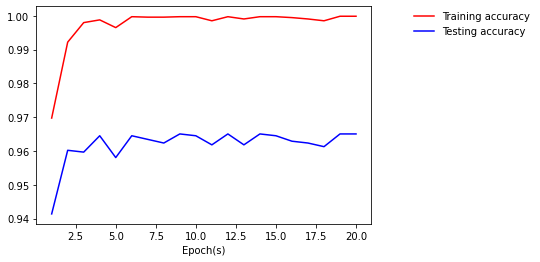

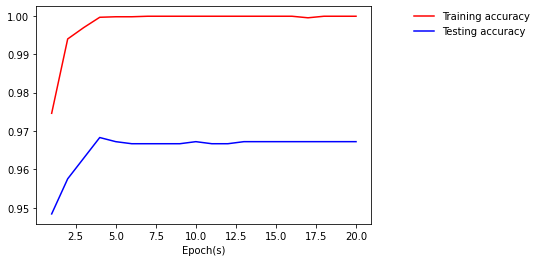

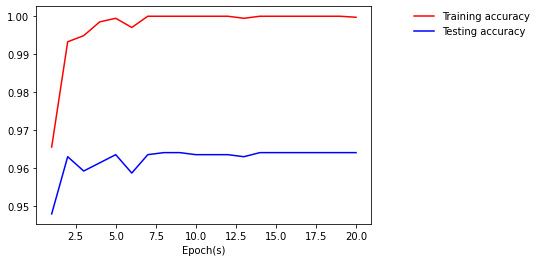

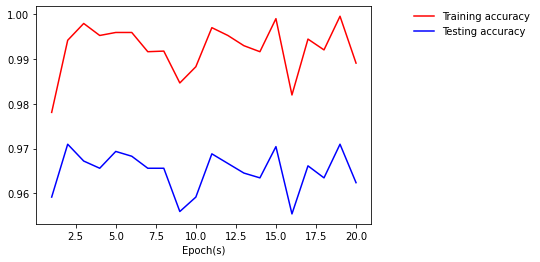

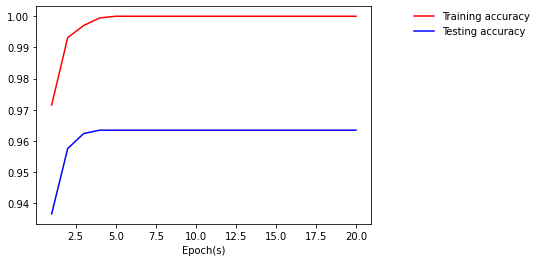

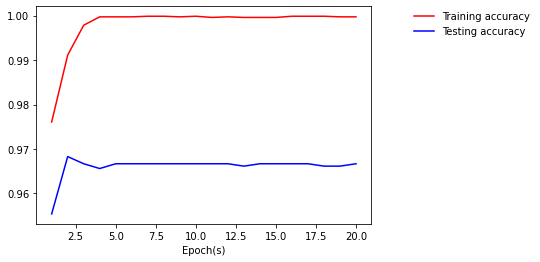

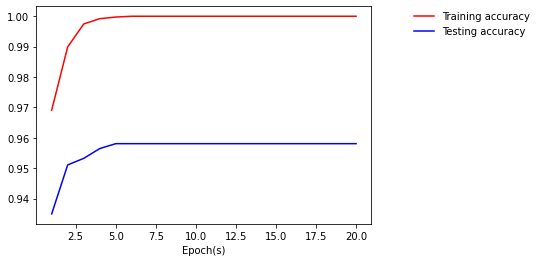

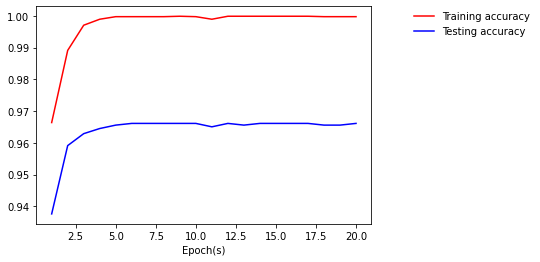

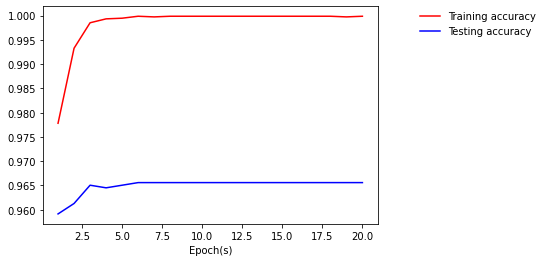

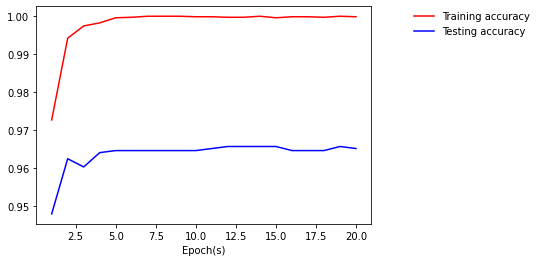

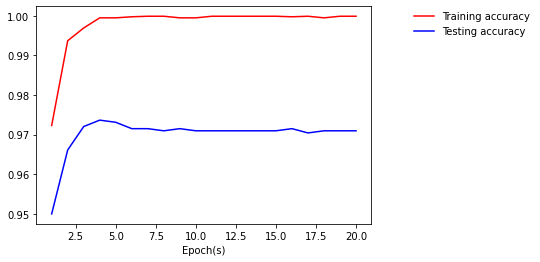

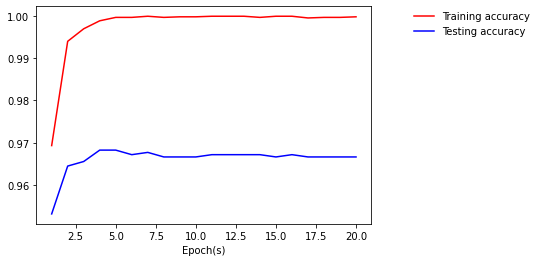

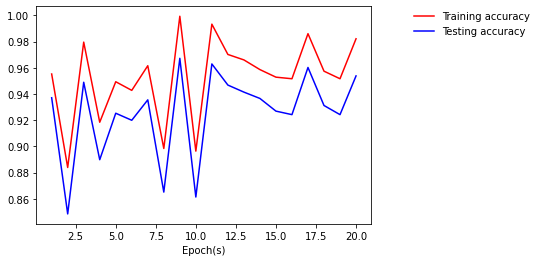

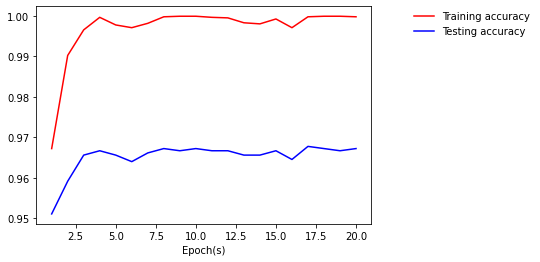

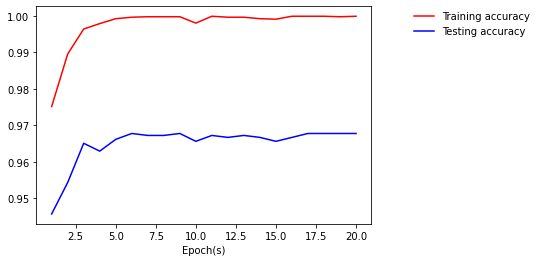

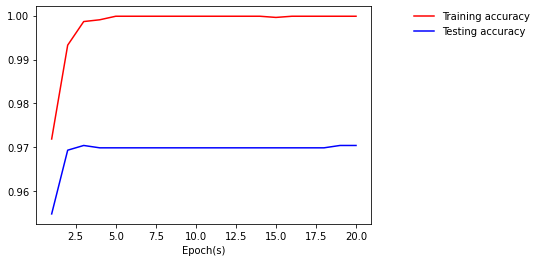

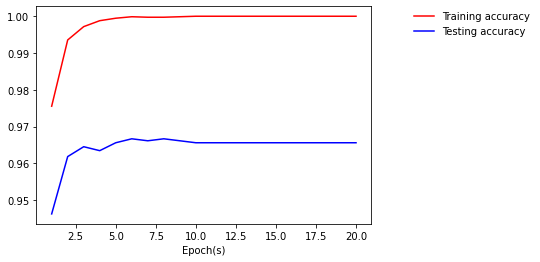

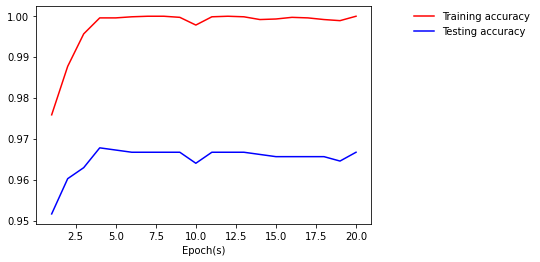

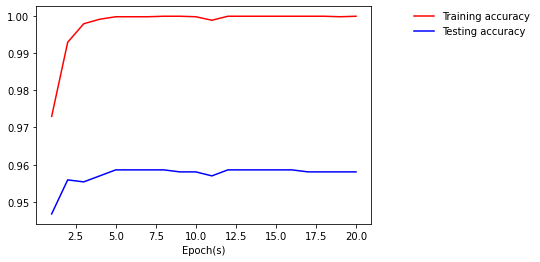

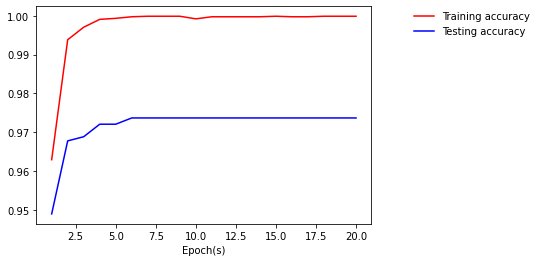

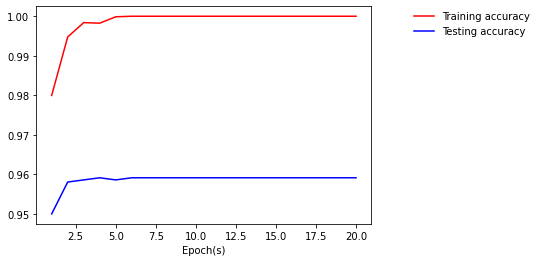

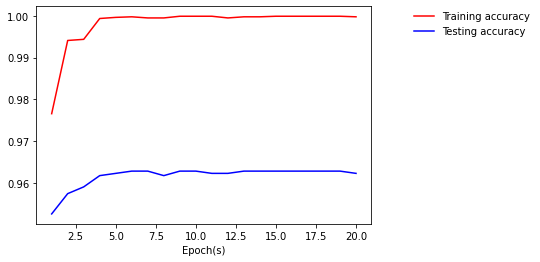

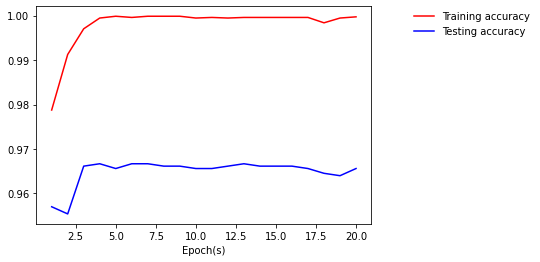

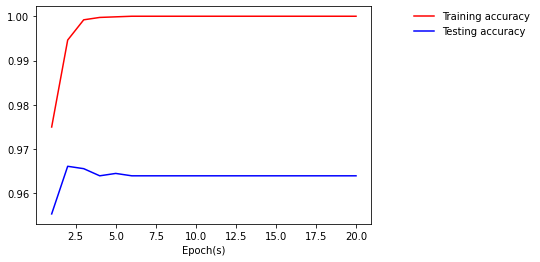

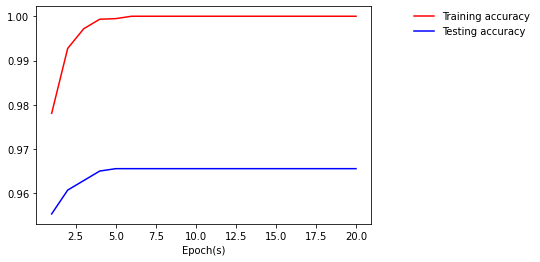

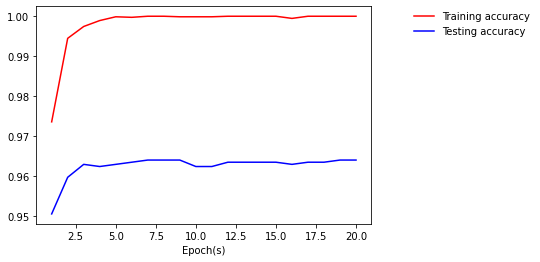

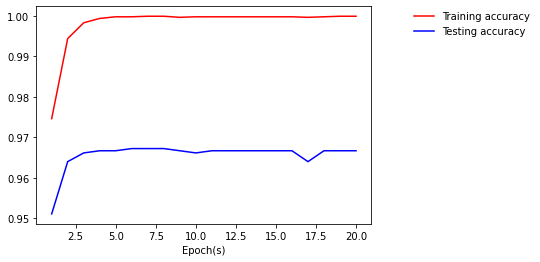

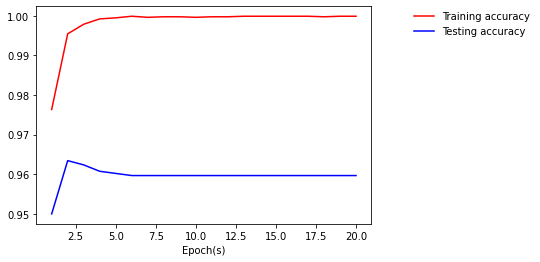

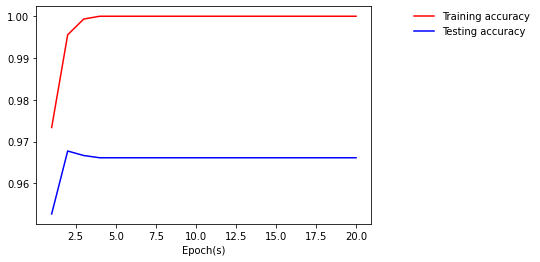

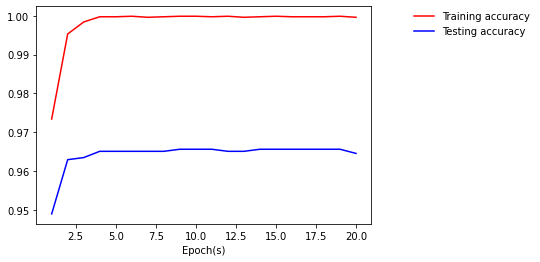

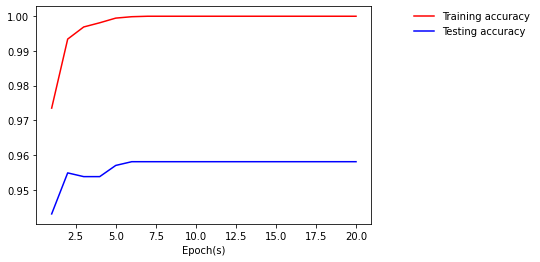

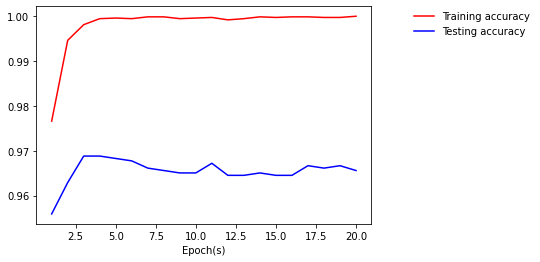

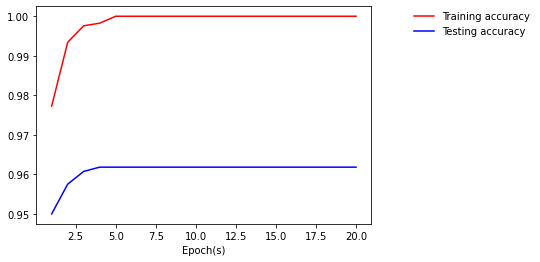

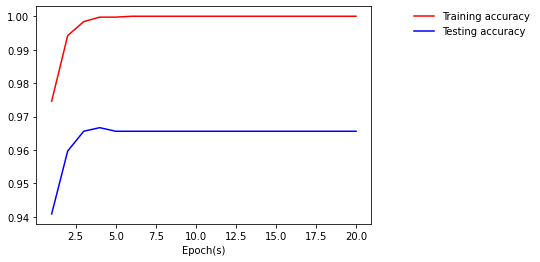

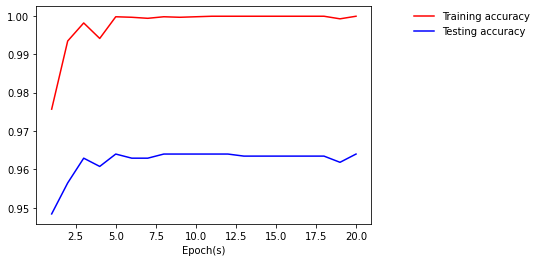

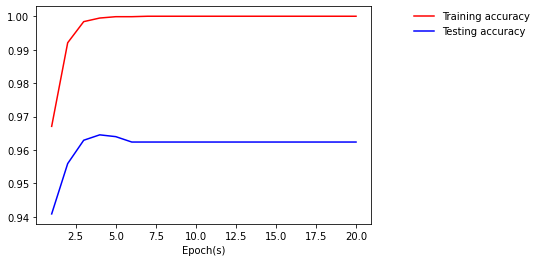

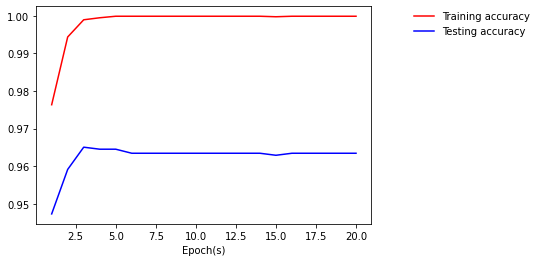

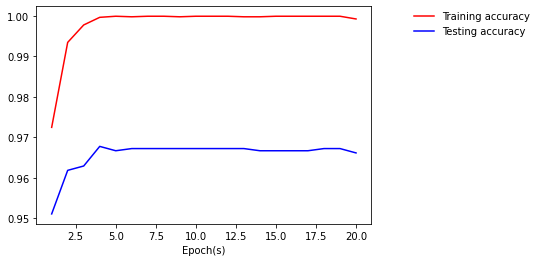

In [10]:
# K-Class Classifier Parameters:
Ker_Meth      = "Poly"
n_classes     = 10
n_classifiers = int(n_classes*(n_classes - 1)/2)
n_epochs      = 20

classifier_values = np.zeros((n_classifiers, 2))
idx = 0
for c1 in np.arange(10):
    for c2 in np.arange(c1+1,10):
        classifier_values[idx] = [c1, c2]
        idx += 1

# Question 1a):
Training_Error_Mean  = []
Training_Error_Stdev = []
Testing_Error_Mean   = []
Testing_Error_Stdev  = []

# ---------------Training--------------------------
# Question 1a):
# Loop for d from 1 to 7
for Ker_para in range(1,8):
    print("d = {}".format(Ker_para))

    # Question 1a:
    Training_Error_per_run = []
    Testing_Error_per_run  = []

    print("Precalculate Kernel...")
    KF  = KernelFunctor(Ker_Meth, Ker_para)
    tic = time.perf_counter()
    KN  = KF.kernel_fn(X_dataset) # Kernel matrix
    toc = time.perf_counter()
    print(f"**Kernel calculation finished in {toc - tic:0.4f} seconds")

    # 20 runs:
    for run in range(1,21):
        print("Run: {}".format(run))

        # Index Shuffle for fitting:
        ran_sample_idx       = np.random.permutation(len(Y_dataset))
        split_pt             = round(len(ran_sample_idx)*0.8)

        # Index for Debug:
        # ran_sample_idx       = range(len(Y_dataset))
        # split_pt             = round(len(ran_sample_idx)*0.41911)

        ran_train_sample_idx = ran_sample_idx[:split_pt]
        ran_test_sample_idx  = ran_sample_idx[split_pt:len(ran_sample_idx)]

        # Data sets:
        X_train              = X_dataset[ran_train_sample_idx]
        Y_train              = Y_dataset[ran_train_sample_idx]
        X_test               = X_dataset[ran_test_sample_idx]
        Y_test               = Y_dataset[ran_test_sample_idx]

        nsamples             = len(ran_train_sample_idx)
        n_test_samples       = len(ran_test_sample_idx)

        # Initialize:
        alphas               = np.zeros((n_classifiers, nsamples))
        # alphas               = np.zeros((n_classes, nsamples + n_test_samples))

        # Start Model:
        ovoop = OvO_OnlinePerceptron(alphas, classifier_values, KN, n_classes)

        # Results memory:
        Train_correct_All    = []
        Train_accuracy_All   = []
        Train_mistakes_All   = []
        Test_correct_All     = []
        Test_accuracy_All    = []
        Test_mistakes_All    = []

        for epoch in range(1, n_epochs + 1):
            tic    = time.time()
            alphas = ovoop.fit(ran_train_sample_idx, X_train, Y_train)
            toc    = time.time()

        # ---------------Training Accuracy-----------------
            Train_correct = 0

            # kernel_vals   = KN[:, ran_train_sample_idx]
            kernel_vals   = KN[ran_train_sample_idx]
            kernel_vals   = kernel_vals[:, ran_train_sample_idx]
            pred          = OvO_Prediction(alphas, kernel_vals, classifier_values)
            Train_correct = len(np.where((Y_train - pred.astype(int)) == 0)[0])
            
            # Record results:
            Train_correct_All.append(Train_correct)

            Train_accuracy = Train_correct / nsamples
            Train_accuracy_All.append(Train_accuracy)

            Train_mistakes = nsamples - Train_correct
            Train_mistakes_All.append(Train_mistakes)

            # print("\tTraining correctness = ", Train_correct)
            # print("\tTraining accuracy    = ", Train_accuracy)
            # print("\tTraining mistake(s)  = ", Train_mistakes, "\n")

        # ---------------Testing Accuracy-------------------
            # print(">>Testing:")
            Test_correct = 0

            kernel_vals  = KN[ran_train_sample_idx]
            kernel_vals  = kernel_vals[:, ran_test_sample_idx]
            pred         = OvO_Prediction(alphas, kernel_vals, classifier_values)
            Test_correct = len(np.where((Y_test - pred.astype(int)) == 0)[0])

            # Record results:
            Test_correct_All.append(Test_correct)

            Test_accuracy = Test_correct / n_test_samples
            Test_accuracy_All.append(Test_accuracy)

            Test_mistakes = n_test_samples - Test_correct
            Test_mistakes_All.append(Test_mistakes)

            # print("\tTesting correctness  = ", Test_correct)
            # print("\tTesting accuracy     = ", Test_accuracy)
            # print("\tTesting mistake(s)   = ", Test_mistakes, "\n")
            print(f"**Training: Epoch {epoch} finished in {toc - tic:0.4f} seconds with Train accuracy {Train_accuracy:0.4f} and Test accuracy {Test_accuracy:0.4f}.")
            epoch += 1

        # Question 1a): Save error rate:
        Training_Error_per_run.append(Train_mistakes/nsamples)
        Testing_Error_per_run.append(Test_mistakes/n_test_samples)

        Plot_Accuracy_SV(Ker_para, run, n_epochs + 1, Train_accuracy_All, Test_accuracy_All)

    # Question 1a): Error mean and std:
    Training_Error_Mean.append(np.mean(Training_Error_per_run))
    Training_Error_Stdev.append(np.std(Training_Error_per_run))
    Testing_Error_Mean.append(np.mean(Testing_Error_per_run))
    Testing_Error_Stdev.append(np.std(Testing_Error_per_run))

print("Results:")
print(f"Training Error Mean: {Training_Error_Mean}")
print(f"Training Error STD:  {Training_Error_Stdev}")
print(f"Testing  Error Mean: {Testing_Error_Mean}")
print(f"Testing  Error STD:  {Testing_Error_Stdev}")